<a href="https://colab.research.google.com/github/ShubhraBhuniaGhosh/hello_world/blob/master/pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import plotnine as pln

  

In [108]:
from google.colab import files
uploaded = files.upload()

Saving new.csv to new (2).csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['new.csv']))

In [110]:
data.head()


,country,year,sex,age,suicides_no,population,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicides/100k pop
0,Albania,1987,male,15-24 years,21,312900,Albania1987,NaN,"2,15,66,24,900",796,Generation X,6.71
1,Albania,1987,male,35-54 years,16,308000,Albania1987,NaN,"2,15,66,24,900",796,Silent,5.19
2,Albania,1987,female,15-24 years,14,289700,Albania1987,NaN,"2,15,66,24,900",796,Generation X,4.83
3,Albania,1987,male,75+ years,1,21800,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation,4.59
4,Albania,1987,male,25-34 years,9,274300,Albania1987,NaN,"2,15,66,24,900",796,Boomers,3.28


In [0]:
data.columns=["country","year","gender","age_group","population","sui_pop","country_year","hdi","gdp_for_year","gdp_per_capita","generation","suicide_number"]

In [112]:
data.drop(["country_year","gdp_for_year","hdi"],axis=1,inplace=True)
data.head()

,country,year,gender,age_group,population,sui_pop,gdp_per_capita,generation,suicide_number
0,Albania,1987,male,15-24 years,21,312900,796,Generation X,6.71
1,Albania,1987,male,35-54 years,16,308000,796,Silent,5.19
2,Albania,1987,female,15-24 years,14,289700,796,Generation X,4.83
3,Albania,1987,male,75+ years,1,21800,796,G.I. Generation,4.59
4,Albania,1987,male,25-34 years,9,274300,796,Boomers,3.28


In [0]:
data["age_group"]=data["age_group"].apply(lambda x: str(x).replace('5-14 years','child') if '5-14 years' in str(x) else str(x))
data["age_group"]=data["age_group"].apply(lambda x: str(x).replace('15-24 years','youth') if '15-24 years' in str(x) else str(x))
data["age_group"]=data["age_group"].apply(lambda x: str(x).replace('25-34 years','young adult') if '25-34 years' in str(x) else str(x))
data["age_group"]=data["age_group"].apply(lambda x: str(x).replace('35-54 years','early adult') if '35-54 years' in str(x) else str(x))
data["age_group"]=data["age_group"].apply(lambda x: str(x).replace('55-74 years','adult') if '55-74 years' in str(x) else str(x))
data["age_group"]=data["age_group"].apply(lambda x: str(x).replace('75+ years','senior') if '75+ years' in str(x) else str(x))

In [114]:
data = data.sort_values(by = ["suicide_number","age_group"], ascending = False)
data.head()

,country,year,gender,age_group,population,sui_pop,gdp_per_capita,generation,suicide_number
1258,Aruba,1995,male,senior,2,889,17949,G.I. Generation,224.97
22280,Seychelles,2006,male,senior,2,976,12442,Silent,204.92
24332,Suriname,2012,male,senior,10,5346,10227,Silent,187.06
20542,Republic of Korea,2011,male,senior,1276,688365,25157,Silent,185.37
20530,Republic of Korea,2010,male,senior,1152,631853,22994,Silent,182.32


In [115]:
data.reset_index(inplace= True, drop = True)
data.head()

,country,year,gender,age_group,population,sui_pop,gdp_per_capita,generation,suicide_number
0,Aruba,1995,male,senior,2,889,17949,G.I. Generation,224.97
1,Seychelles,2006,male,senior,2,976,12442,Silent,204.92
2,Suriname,2012,male,senior,10,5346,10227,Silent,187.06
3,Republic of Korea,2011,male,senior,1276,688365,25157,Silent,185.37
4,Republic of Korea,2010,male,senior,1152,631853,22994,Silent,182.32


In [116]:
data.columns

Index(['country', 'year', 'gender', 'age_group', 'population', 'sui_pop',
       'gdp_per_capita', 'generation', 'suicide_number'],
      dtype='object')

In [117]:
type(data)

pandas.core.frame.DataFrame

In [118]:
data.head()

,country,year,gender,age_group,population,sui_pop,gdp_per_capita,generation,suicide_number
0,Aruba,1995,male,senior,2,889,17949,G.I. Generation,224.97
1,Seychelles,2006,male,senior,2,976,12442,Silent,204.92
2,Suriname,2012,male,senior,10,5346,10227,Silent,187.06
3,Republic of Korea,2011,male,senior,1276,688365,25157,Silent,185.37
4,Republic of Korea,2010,male,senior,1152,631853,22994,Silent,182.32


In [133]:
x = data.iloc[:,:-1]
x.head()

,country,year,gender,age_group,population,sui_pop,gdp_per_capita,generation
0,Aruba,1995,male,senior,2,889,17949,G.I. Generation
1,Seychelles,2006,male,senior,2,976,12442,Silent
2,Suriname,2012,male,senior,10,5346,10227,Silent
3,Republic of Korea,2011,male,senior,1276,688365,25157,Silent
4,Republic of Korea,2010,male,senior,1152,631853,22994,Silent


In [134]:
y = data.iloc[:,-1]
y.head()

0    224.97
1    204.92
2    187.06
3    185.37
4    182.32
Name: suicide_number, dtype: float64

In [135]:
x= pd.get_dummies(x, columns=['country', 'gender','age_group','generation'], drop_first=True)
x.head()


,year,population,sui_pop,gdp_per_capita,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Cabo Verde,country_Canada,country_Chile,country_Colombia,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czech Republic,country_Denmark,country_Dominica,country_Ecuador,country_El Salvador,country_Estonia,country_Fiji,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,...,country_Qatar,country_Republic of Korea,country_Romania,country_Russian Federation,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and Grenadines,country_San Marino,country_Serbia,country_Seychelles,country_Singapore,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Sri Lanka,country_Suriname,country_Sweden,country_Switzerland,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,gender_male,age_group_child,age_group_early adult,age_group_senior,age_group_young adult,age_group_youth,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1995,2,889,17949,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,2006,2,976,12442,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,2012,10,5346,10227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,2011,1276,688365,25157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,2010,1152,631853,22994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1


In [0]:
#x = x.corr()

In [137]:
x.head()

,year,population,sui_pop,gdp_per_capita,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Cabo Verde,country_Canada,country_Chile,country_Colombia,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czech Republic,country_Denmark,country_Dominica,country_Ecuador,country_El Salvador,country_Estonia,country_Fiji,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,...,country_Qatar,country_Republic of Korea,country_Romania,country_Russian Federation,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and Grenadines,country_San Marino,country_Serbia,country_Seychelles,country_Singapore,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Sri Lanka,country_Suriname,country_Sweden,country_Switzerland,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,gender_male,age_group_child,age_group_early adult,age_group_senior,age_group_young adult,age_group_youth,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1995,2,889,17949,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,2006,2,976,12442,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,2012,10,5346,10227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,2011,1276,688365,25157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,2010,1152,631853,22994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1


In [0]:
x = pd.DataFrame.to_numpy(x)

In [0]:
y = pd.DataFrame.to_numpy(y)

In [0]:
"""import numpy as np 
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
"""

TypeError: ignored

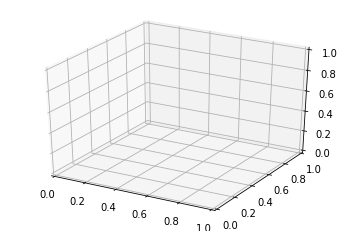

In [125]:
"""mpl.rcParams['legend.fontsize'] = 12

fig = plt.figure() 
ax = fig.gca(projection ='3d') 

ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5) 
ax.legend() 
ax.view_init(45, 0) 

plt.show() """

In [0]:
"""def mse(coef, x, y): 
	return np.mean((np.dot(x, coef) - y)**2)/2

def gradients(coef, x, y): 
	return np.mean(x.transpose()*(np.dot(x, coef) - y), axis = 1) 

def multilinear_regression(coef, x, y, lr, b1 = 0.9, b2 = 0.999, epsilon = 1e-8): 
	prev_error = 0
	m_coef = np.zeros(coef.shape) 
	v_coef = np.zeros(coef.shape) 
	moment_m_coef = np.zeros(coef.shape) 
	moment_v_coef = np.zeros(coef.shape) 
	t = 0

	while True: 
		error = mse(coef, x, y) 
		if abs(error - prev_error) <= epsilon: 
			break
		prev_error = error 
		grad = gradients(coef, x, y) 
		t += 1
		m_coef = b1 * m_coef + (1-b1)*grad 
		v_coef = b2 * v_coef + (1-b2)*grad**2
		moment_m_coef = m_coef / (1-b1**t) 
		moment_v_coef = v_coef / (1-b2**t) 

		delta = ((lr / moment_v_coef**0.5 + 1e-8) *
				(b1 * moment_m_coef + (1-b1)*grad/(1-b1**t))) 

		coef = np.subtract(coef, delta) 
	return coef 

coef = np.array([0, 0, 0]) 
c = multilinear_regression(coef, x, y, 1e-1) 

"""

ValueError: ignored

In [0]:
"""fig = plt.figure() 
ax = fig.gca(projection ='3d') 

ax.scatter(x[:, 1], x[:, 2], y, label ='y', 
				s = 5, color ="dodgerblue") 

ax.scatter(x[:, 1], x[:, 2], c[0] + c[1]*x[:, 1] + c[2]*x[:, 2], 
					label ='regression', s = 5, color ="orange") 

ax.view_init(45, 0) 
ax.legend() 
plt.show() """

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [141]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Pridicting test set result


In [142]:
y_pred = reg.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[24.4  19.8 ]
 [-6.92  0.17]
 [ 1.73  0.  ]
 ...
 [22.83 22.9 ]
 [-0.12  2.67]
 [18.76 38.12]]
